# Salários de San Francisco

[Arquivos](https://www.kaggle.com/kaggle/sf-salaries)

In [42]:
import pandas as pd
%matplotlib inline

In [9]:
data = pd.read_csv('http://dadosdatascience.netlify.com/Salaries.csv', index_col='Id')
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.7+ MB


### Média de Salário Base

In [12]:
data['BasePay'].mean()

66325.44884050643

### Valor mais elevado de pagamento de hora extra

In [14]:
data['OvertimePay'].max()

245131.88

### Qual é o job title de JOSEPH DRISCOLL

In [15]:
data[data['EmployeeName'] == 'JOSEPH DRISCOLL']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,NaN,San Francisco,NaN


### Qual é a renda de JOSEPH DRISCOLL (Incluindo benefícios)

In [16]:
data[data['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

Id
25    270324.91
Name: TotalPayBenefits, dtype: float64

### Qual pessoa recebe o pagamento mais elevado (incluindo benefícios)

In [17]:
data[data['TotalPayBenefits'] == data['TotalPayBenefits'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [18]:
data.loc[data['TotalPayBenefits'].idxmax()]

EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                       NaN
TotalPay                                                    567595
TotalPayBenefits                                            567595
Year                                                          2011
Notes                                                          NaN
Agency                                               San Francisco
Status                                                         NaN
Name: 1, dtype: object

### Qual o nome da pessoa que tem o menor pagamento

In [22]:
data['TotalPayBenefits'].min()

-618.13

In [24]:
data.loc[data['TotalPayBenefits'].idxmin()]

EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Notes                                      NaN
Agency                           San Francisco
Status                                     NaN
Name: 148654, dtype: object

### Qual é a média de Salário Base para todos os funcionários por ano (2011-2014)

In [25]:
data.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

### Quantos títulos únicos de trabalho existem

In [26]:
data['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

### Quais são os top5 trabalhos mais comuns

In [27]:
data['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### Quantos JobTitles foram representados por apenas uma única pessoa em 2013

In [28]:
sum(data[data['Year']==2013]['JobTitle'].value_counts() == 1)

202

### Quantas pessoas possuem a palavra Chief em seu título de trabalho

In [30]:
def chief_string(title):
    if 'chief' in title.lower().split():
        return True
    else:
        return False

In [31]:
sum(data['JobTitle'].apply(lambda x: chief_string(x)))

477

### Vejamos se existe uma correlação entre o comprimento do título do trabalho e o salário

In [32]:
data['title_len'] = data['JobTitle'].apply(len)

In [38]:
data[['JobTitle','title_len']].head(10)

,JobTitle,title_len
Id,,
1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,46
2,CAPTAIN III (POLICE DEPARTMENT),31
3,CAPTAIN III (POLICE DEPARTMENT),31
4,WIRE ROPE CABLE MAINTENANCE MECHANIC,36
5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",44
6,ASSISTANT DEPUTY CHIEF II,25
7,"BATTALION CHIEF, (FIRE DEPARTMENT)",34
8,DEPUTY DIRECTOR OF INVESTMENTS,30
9,"BATTALION CHIEF, (FIRE DEPARTMENT)",34


In [46]:
data[['title_len','BasePay']].corr()

,title_len,BasePay
title_len,1.000000,-0.005059
BasePay,-0.005059,1.000000


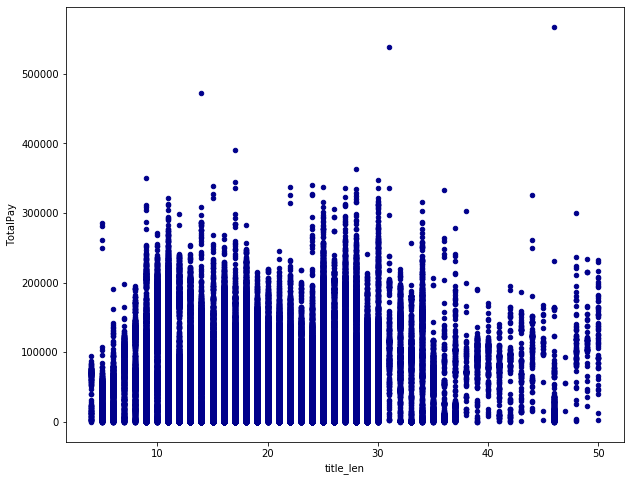

In [55]:
data.plot.scatter(x='title_len', y='TotalPay', figsize=(10,8), c='DarkBlue')